# Hydrous mantle melting

This notebook reproduces figures from the hydrous mantle melting model of Katz _et al._ (2003).


#### References

> Katz, R. F., Spiegelman, M., & Langmuir, C. H. (2003). A new parameterization of hydrous mantle melting. _Geochemistry, Geophysics, Geosystems_, _4_(9), 1–19. https://doi.org/10.1029/2002GC000433

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from melt import katz_2003 as mlt

%matplotlib inline

## Figure 1

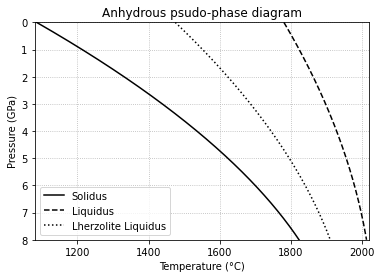

In [14]:
# create a pressure range
P_range = np.linspace(0, 8, 1000)

# plot
fig = plt.figure()
ax1 = fig.add_subplot(111, xlim=[1080,2020], ylim=[0,8], title='Anhydrous psudo-phase diagram')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Pressure (GPa)')

ax1.plot(mlt.T_solidus(P_range), P_range, 'k', label='Solidus')
ax1.plot(mlt.T_liquidus(P_range), P_range, 'k--', label='Liquidus')
ax1.plot(mlt.T_liquidus_lherz(P_range), P_range, 'k:', label='Lherzolite Liquidus')

ax1.invert_yaxis()
ax1.grid(True, linestyle=':')
ax1.legend()

Reproduce __Figure 2__

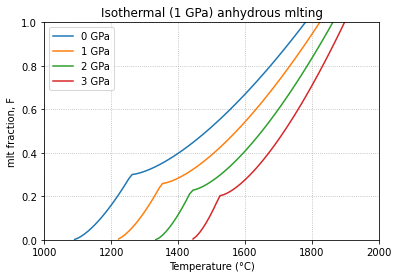

In [15]:
T_range = np.linspace(1000,2000,100)

fig = plt.figure()
ax1 = fig.add_subplot(111, xlim=[1000,2000], ylim=[0,1], title='Isothermal (1 GPa) anhydrous mlting')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('mlt fraction, F')

for P in range(0, 4):
    F_range = mlt.F_dry(P,T_range,0.15)
    ax1.plot(T_range, F_range, label='{} GPa'.format(P))
    
ax1.grid(True, linestyle=':')
ax1.legend()

Reproduce __Figure 3__

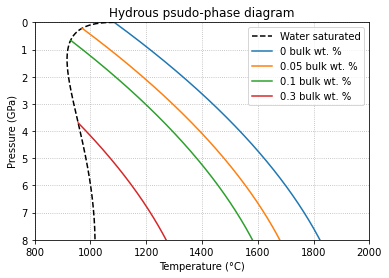

In [16]:
P_range = np.linspace(0, 8, 1000)

fig = plt.figure()
ax1 = fig.add_subplot(111, xlim=[800,2000], ylim=[0,8], title='Hydrous psudo-phase diagram')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Pressure (GPa)')

T_s = mlt.T_solidus(P_range)
X = mlt.X_sat(P_range)
delT = mlt.delta_T(X)
T_saturated = T_s - delT
ax1.plot(T_saturated, P_range, 'k--', label='Water saturated')

for wt in [0, 0.05, 0.1, 0.3]:
    T_s = mlt.T_solidus(P_range)
    F = mlt.F_dry(P_range, T_s, 0.15)
    X = mlt.X_H2O(wt, F)
    delT = mlt.delta_T(X)
    T_range = T_s - delT
    
    # clip below wet solidus
    T_range[T_range < T_saturated] = np.nan
    ax1.plot(T_range, P_range, label='{} bulk wt. %'.format(wt))
    
ax1.invert_yaxis()
ax1.legend()
ax1.grid(True, linestyle=':')

Reproduce __Figure 4__

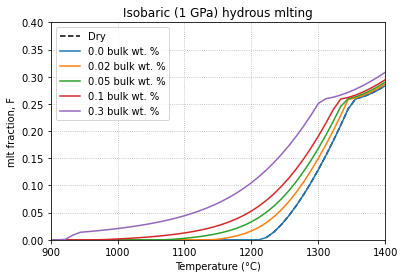

In [17]:
T_range = np.linspace(900,2000,100)

fig = plt.figure()
ax1 = fig.add_subplot(111, xlim=[900,1400], ylim=[0,0.4], title='Isobaric (1 GPa) hydrous mlting')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('mlt fraction, F')

ax1.plot(T_range, mlt.F_dry(1.0, T_range, 0.15), 'k--', label='Dry')

for X in [0., 0.02, 0.05, 0.1, 0.3]:
    F_range = mlt.F_wet(1.0, T_range, X)
    ax1.plot(T_range, F_range, label='{} bulk wt. %'.format(X))
    
ax1.grid(True, linestyle=':')
ax1.legend()